# La régression linéaire, entre machine learning, statistiques et optimisation

## Introduction

La régression linéaire est un modèle cherchant à établir un lien linéaire entre des données d'observation et des données à prédire. Plus concrètement, les données observées sont décrites par un vecteur $\mathbf{x} \in \mathbb{R}^d$ et la variable à prédire, par une quantité scalaire (un réel) $y \in \mathbb{R}$ (par un abus important de langage, $\mathbf{x}$ et $y$ expriment à la fois une variable aléatoire et sa réalisation) et le lien s'exprime sous le format suivant :

\begin{equation}
y = \beta_0 +  x_1 \beta_1 + x_2 \beta_2 + x_3 \beta_3 + ... + x_d \beta_d +\epsilon = \beta_0 + \sum_i^d x_i \beta_i+\epsilon,\ \epsilon\sim\mathcal{N}(0, \sigma)
\end{equation}

que l'on peut aussi écrire en notation vectorielle:

\begin{equation}
y = \beta_0  + \langle \boldsymbol{\beta}, \mathbf{x} \rangle +\epsilon,\ \epsilon\sim\mathcal{N}(0, \sigma)
\end{equation}

où $\boldsymbol{\beta} \in \mathbb{R}^d$ correspond au vecteur contenant les paramètres du "vrai" modèle qui défini le lien entre les données et que l'on va vouloir apprendre pour prédire la bonne valeur de $y$ en fonction du vecteur $\mathbf{x}$. Le modèle linéaire ne peut prédire la variable $y$ qu'à un bruit $\epsilon$ près. Une fois ces paramètres appris par notre algorithme d'apprentissage, on pourra utiliser la fonction de prédiction $f_{\boldsymbol{\beta}}(\mathbf{x}) : \mathbb{R}^d \rightarrow \mathbb{R}$ apprise pour prédire la valeur de $y_{new}$ sur un nouveau vecteur $\mathbf{x_{new}}$ que l'on n'a pas encore observé:

\begin{equation}
\hat{y}_{new} = f_{\boldsymbol{\beta}}(\mathbf{x_{new}}) = \beta_0  + \langle \boldsymbol{\beta}, \mathbf{x_{new}} \rangle
\end{equation}

Pour simplifier les calculs et les notations, on préfère que la fonction de prédiction puisse se calculer à partir d'une notation complètement vectorielle. Ce que l'on fait en pratique, en ajoutant une composante supplémentaire $x_0$ au vecteur $\mathbf{x}$ égale à $1$:
\begin{align}
    \mathbf{x} &= \begin{bmatrix}
          1 \\
           x_{1} \\
           \vdots \\
           x_{d}
         \end{bmatrix},
\end{align}

de sorte à ce que la fonction de prédiction linéaire puisse s'exprimer simplement sous la forme du produit scalaire: 
\begin{align}
    f_{\boldsymbol{\beta}}(\mathbf{x}) &= \langle \boldsymbol{\beta}, \mathbf{x} \rangle &=
          \begin{bmatrix}
           \beta_{0} \\           
           \vdots \\
           \beta_{d}
          \end{bmatrix}^T
          \begin{bmatrix}
           1 \\
           \vdots \\
           x_{d}
         \end{bmatrix} &= \sum_{i=0}^d x_i \beta_i=\langle \boldsymbol{x}, \boldsymbol{\beta}\rangle_{\mathbb{R}^{d+1}}
\end{align}

où cette fois $\boldsymbol{\beta} \in \mathbb{R}^{d+1}$, $\boldsymbol{x} \in \mathbb{R}^{d+1}$ et $\langle \cdot, \cdot\rangle_{\mathbb{R}^{d+1}}$ est le produit scalaire dans $\mathbb{R}^{d+1}$. Le but d'un algorithme d'apprentissage sera de trouver un estimateur $\boldsymbol{\hat{\beta}}$ de $\boldsymbol{\beta}$ à partir d'un ensemble finis de $n$ exemples d'apprentissage $(\boldsymbol{x}, \langle \boldsymbol{\beta}, \boldsymbol{x} \rangle + \epsilon) \in \mathbb{R}^2$ préalablement collectés. On notera $\mathcal{S}=\{(\boldsymbol{x_i}, y_i)\}_{i\leq n}$ le jeu de données.

Dans cet exercice, vous implémenterez le cas simple d'une régréssion linéaire à une seule variable d'entrée et une seule variable de sortie qui pourra donc s'écrire sous la forme :

\begin{equation}
\hat{y} = f_{\boldsymbol{\beta}}(\mathbf{x}) = \beta_0  + \beta_1 x
\end{equation}

C'est à dire une "brave" fonction affine dont on pourra afficher la représentation graphique (une droite) sur une figure en 2 dimensions. Par la suite vous aurez donc à implémenter le calcul de la fonction de coût du modèle sur l'ensemble d'apprentissage, le calcul du gradient de cette fonction de coût ainsi que l'algorithme de descente de gradient qui, à partir du gradient, permet d'obtenir le vecteur $\hat{\beta}$.

La seconde partie de ce notebook étendra ces notions à des conceptions plus compliquées.

# Construction d'un jeu de données

Commençons tout d'abord par simuler notre jeu de données avec un le modèle génératif suivant :

\begin{equation}
\boldsymbol{x} \sim \mathcal{N}(\mu, \sigma) \in \mathbb{R}
\end{equation}

ou $\sigma$ correspond à la variance de la variable explicative. Nous choissons une règle arbitraire pour générer aléatoirement les paramètres du "vrai" modèle :

\begin{equation}
\boldsymbol{\beta} \sim \mathbb{U}(-1, 1)^2 \in \mathbb{R}^2
\end{equation}

où $\mathbb{U}^2$ est la loi uniforme dans $\mathbb{R}^2$. Enfin, le bruit est construit de la manière suivante :
\begin{equation}
\epsilon \sim \mathcal{N}(0, 1).
\end{equation}

Chaque exemple d'apprentissage correspond donc à un couple de réels $(x_j, y_j = \beta_0  + \beta_1 x_j + \epsilon) \in \mathbb{R}^2$. Le code ci dessous affiche le jeux de données ainsi que la représentation graphique de $f(x)=\beta_1x+\beta_0$.

In [1]:
import numpy as np

# on simule le vecteur de parametre
beta = np.random.uniform(-1, 1, size=(2,1))

# on construit un jeu de donnees de 10 points selon la methode 
# decrite ci-dessus.
def sample_data(n, sigma=5, add_noise=True):
    X = np.random.normal(0, sigma, size=n)
    noise = np.random.normal(0, 1, size=n)*(add_noise*1)
    y = beta[1] * X + noise + beta[0]
    return X, y

X, y = sample_data(10, add_noise=True)  # jouer avec le bruit

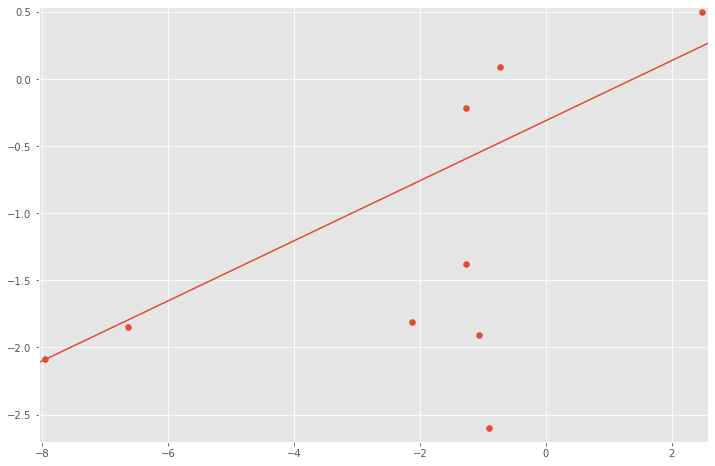

In [2]:
import matplotlib
import matplotlib.pyplot as plt

# configuration generale de matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('ggplot')

# plot de la fonction
def plot(X, y, beta=None, func=None):
    eps = 0.1
    plt.scatter(X, y)
    ymin_ = y.min() - eps
    ymax_ = y.max() - eps
    min_ = X.min() - eps
    max_ = X.max() + eps
    if beta is not None or func is not None:
        x_ = np.linspace(min_, max_, 500)
        if func is None:
            y_ = beta[1] * x_ + beta[0]
            plt.plot(x_, y_)
        else:
            func = [(func, '')] if type(func) is not list else func
            disp_legend = False
            for t in func:
                y_ = t[0](x_.reshape((x_.shape[0], 1)))
                plt.plot(x_, y_, label=t[1])
                disp_legend = disp_legend or t[1] != ''
            if disp_legend:
                plt.legend()

    plt.xlim((min_, max_))
    plt.ylim((ymin_, ymax_))
    plt.show()
    
# on plot le dataset precedent
plot(X, y, beta)

---
<span style="color:blue">**Question :**</span> **Que se passe-t-il si le bruit $\epsilon$ est nul ? Quelle est alors la méthode la plus rapide pour trouver les paramètres du vrai modèle ?**

---

**<span style="color:green">Réponse:</span>** Prenons le cas d'une régression $f_\beta:\mathbb{R}\mapsto\mathbb{R}$. Si le bruit $\epsilon$ est nul, alors l'ensemble des couples $(x, y)$ sont alignés sur la même droite. Ainsi, étant donné un jeu de données de taille $2$, $(x_1, y_1)$ et $(x_2, y_2)$, nous pouvons calculer le coefficient directeur de la droite, noté $\beta_1$:
\begin{equation}
\beta_1=\frac{y_2-y_1}{x_2-x_1}
\end{equation}

Le coefficient directeur obtenu, nous pouvons calculer le biais $\beta_0$:
\begin{equation}
\beta_0=y_1-\beta_1x_1.
\end{equation}

## Du modèle statistique à l'optimisation

### La fonction objectif

Nous souhaitons en pratique trouver un paramêtre $\boldsymbol{\hat{\beta}}$ qui minimise le risque du modèle, c'est-à-dire la quantité d'erreur en espérance de n'importe quel modèle $\boldsymbol{\beta}$. On notera $\boldsymbol{\beta}^\star$ le "vrai" modèle, soit celui qui minimise le risque en espérance. Pour la régression linéaire, on peut définir ce risque comme :

\begin{equation}
R(\boldsymbol{\beta}) = \mathbb{E}_{X\times Y}\Big[ (f_{\boldsymbol{\beta}}(\mathbf{X}) - Y)^2 \Big].
\end{equation}

On ne sait pas calculer cette fonction. Cependant, on peut en avoir un estimateur via un jeu de données $\mathcal{S}$, où $\mathcal{S} = \Big\{ \big(\boldsymbol{x_j}, y_j \big) \Big\}_{j\leq n}$ est un jeu de données composé de $n$ points indépendants et identiquement distribués selon le modèle génératif décrit précédement. 


A défaut d'avoir accès au risque (i.e. à l'erreur en espérance), on peut utiliser une autre quantité qui consiste en la somme des carrés des erreurs de prédictions pour chaque exemple d'apprentissage, c'est **le risque emprique** :

\begin{equation}
J(\boldsymbol{\beta}) = R_{emp}(\boldsymbol{\beta}) = \frac{1}{n}\sum_j^n (f_{\boldsymbol{\beta}}(x_j) - y_j)^2
\end{equation}

où $f_{\boldsymbol{\beta}}(x_j) = \beta_0  + \beta_1 x_j$. On montre assez facilement que pour un $\boldsymbol{\beta}$ quelconque :

\begin{equation}
R(\boldsymbol{\beta})=\mathbb{E}_{\mathcal{S \sim \mathbb{P}(S)}}\big[J(\boldsymbol{\beta})\big],
\end{equation}

Notons que minimiser ce risque empirique revient à chercher le maximum de vraisemblance du modèle statistique. Effectivement, avec l'hypothèse gausienne, la vraissemblance de n'importe quel modèle de paramètres $\boldsymbol{\beta}$ pour un jeu de données $\mathcal{S}$ peut s'écrire :

\begin{equation}
L_{\mathcal{S}}(\boldsymbol{\beta}) \propto \prod_{\boldsymbol{x}\times y\in\mathcal{S}} \exp\Bigg(-\frac{\big(f_{\boldsymbol{\beta}}(\mathbf{x}) - y\big)^2}{2}\Bigg)
\end{equation}

Le paramètre maximisant la vraissamblance est aussi celui minimisant la log-vraissamblance négative :
\begin{equation}
- \log \Big( L_{\mathcal{S}}(\boldsymbol{\beta})\Big) = \sum_{\boldsymbol{x}\times y\in\mathcal{S}}\frac{\big(f_{\boldsymbol{\beta}}(\mathbf{x}) - y\big)^2}{2}\propto\sum_{\boldsymbol{x}\times y\in\mathcal{S}}\big(f_{\boldsymbol{\beta}}(\mathbf{x}) - y\big)^2
\end{equation}

N'ayant accès au véritable risque, on cherche $\boldsymbol{\hat{\beta}}$ tel que :

\begin{equation}
\boldsymbol{\hat{\beta}} = argmin_{\boldsymbol{\beta}} \Big[ - \log \Big( L_{\mathcal{S}}(\boldsymbol{\beta})\Big) \Big]
\end{equation}

Minimiser le risque emprique se traduit donc naturellement par un problème d'optimisation de la fonction de coût $J(\boldsymbol{\beta}) : \mathbb{R}^2 \rightarrow \mathbb{R}$ ($\mathbb{R}^2$ dans notre exemple courant, $\mathbb{R}^{d+1}$ dans le cas général) par rapport à $\boldsymbol{\beta}$.

En pratique et pour des raisons de simplicités, on ne minimise pas $\sum_{\boldsymbol{x}\times y\in\mathcal{S}}\big(f_{\boldsymbol{\beta}}(\mathbf{x}) - y\big)^2$ mais :
\begin{equation}
J(\boldsymbol{\beta}) = \frac{1}{2n}\sum_{\boldsymbol{x}\times y\in\mathcal{S}} (f_{\boldsymbol{\beta}}(x) - y)^2
\end{equation}
Le résultat est bien évidemment le même. La division par $2$ est là pour simplifier l'expresion du gradient que l'on calculera et la division par $n$ permet de rendre la norme du gradient indépendente de la taille de notre jeu de données. C'est une propriété importante pour l'algorithme de descente de gradient dont la taille des déplacements affecte sa stabilité.

**Note - Notation vectorielle de la régression linéaire :** On peut aussi exprimer ce calcul avec une simple équation en notation vectorielle. Pour cela, on exprime dans un premier temps le résultat de la fonction de prédiction en notation vectorielle (il s'agit de la prédiction pour tout notre jeu de données) :

\begin{equation}
f_{\boldsymbol{\beta}}(\mathbf{X}) = \mathbf{X}\boldsymbol{\beta}\in\mathbb{R}^n
\end{equation}

où $\boldsymbol{\beta} \in \mathbb{R}^d$ est une matrice de dimensions $d$ x $1$ et $\mathbf{X}$ est une matrice de dimensions $n\times d$ dont les $n$ vecteurs lignes correspondent aux vecteurs d'apprentissage d'entrée. Dans notre cas de la régression linéaire à $1$ variable la matrice prend la forme suivante :

\begin{equation}
\mathbf{X} = 
\begin{pmatrix} 
1 & x_{1} \\
. & .\\
1 & x_{j} \\
. & .\\
1 & x_{n} 
\end{pmatrix},\ \boldsymbol{\beta}=
\begin{bmatrix}
\beta_{0} \\           
\beta_{1}
\end{bmatrix}
\end{equation}

La fonction de coût peut ainsi s'exprimer :

\begin{equation}
J(\boldsymbol{\beta}) = \frac{1}{2n} (\mathbf{X}\boldsymbol{\beta} - \mathbf{y})^T(\mathbf{X}\boldsymbol{\beta} - \mathbf{y})
\end{equation}

que l'on peut réécrire :

\begin{equation}
J(\boldsymbol{\beta}) = \frac{1}{2n} (\mathbf{\hat{y}} - \mathbf{y})^T(\mathbf{\hat{y}} - \mathbf{y}) =  \frac{1}{2n} ||\mathbf{\hat{y}} - \mathbf{y}||_2^2
\end{equation}

où $\mathbf{y} \in  \mathbb{R}^n$ est le vecteur dont chacune des composantes $y_j$ sont les valeurs à prédire à partir de leur $x_j$ correspondant, et $\hat{y} \in  \mathbb{R}^n$ correspond aux valeurs prédites par le modèle. On note ici que la fonction objectif à optimiser peut se calculer aisément en utilisant la norme euclidienne d'un simple vecteur différence.

### Optimisation par Descente de gradient
La descente de gradient est une méthode d'optimisation numérique permettant de trouver les valeurs des paramètres qui minimisent une fonction. Dans notre cas, nous voulons minimiser l'erreur de prédiction moyenne de notre modèle, fonction définie précédemment. Cette méthode d'optimisation consiste à calculer le gradient de notre fonction objectif par rapport aux paramètres du modèles et de déplacer le vecteur des paramètres courant par une "petite" translation dans la direction opposée au gradient (i.e. le gradient donne la plus forte croissance et son opposé la plus forte décroissance).

**Définition générale du gradient d'une fonction à plusieurs variables :** Il s'agit simplement du vecteur contenant les dérivées partielles de la fonction, c-à-d les dérivées de la fonction par rapport à chaque variable indépendamment des autres:
\begin{equation}
\nabla_{\boldsymbol{\beta}} J(\boldsymbol{\beta}) = \frac{\partial J(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 
\begin{bmatrix}
\frac{\partial J(\beta)}{\partial \beta_0}\\
\frac{\partial J(\beta)}{\partial \beta_1}\\
 \vdots \\
\frac{\partial J(\beta)}{\partial \beta_d}
\end{bmatrix}
\end{equation}

En descente de gradient, la mise à jour de chaque paramètre $\beta_j$ du modèle à l'itération $t$ se fait donc avec la règle suivante:
\begin{equation}
\beta_j^{(t+1)} = \beta_j^{(t)} - \rho  \frac{\partial J(\beta^{(t)})}{\partial \beta_j}
\end{equation}
ou bien, en notation vectorielle:
\begin{equation}
\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \rho  \nabla_{\boldsymbol{\beta}} J(\boldsymbol{\beta})^{(t)}
\end{equation}
où $\rho$ est le learning rate (pas d'apprentissage).

### À vous de jouer

---
<span style="color:blue">**Question 1 :**</span> **Compléter la méthode $\texttt{val}$ de l'objet $\texttt{LeastSquare}$ ci-dessous.**


<span style="color:blue">**Question 2 :**</span> **Calculez les dérivées partielles $\frac{\partial J(\beta)}{\partial \beta_0}$ et $\frac{\partial J(\beta)}{\partial \beta_1}$ de la fonction de coût de notre modèle de régréssion linéaire. Complétez la méthode $\texttt{grad}$ de l'objet $\texttt{LeastSquare}$ ci dessous.**

**<span style="color:orange">Indice</span>**  Rappellez vous que la dérivée d'une composition de fonction s'écrit $(g \circ f)\prime (x) = f\prime(x) g\prime(f(x))$ et que la fonction de coût de notre modèle s'écrit:

\begin{equation}
J(\boldsymbol{\beta}) = \frac{1}{2n}\sum_j^n g(f_{\boldsymbol{\beta}}(x_j) - y_j)
\end{equation}

avec $g(z) = z ^ 2$ et $f_{\boldsymbol{\beta}}(x_j) = \beta_0  + \beta_1 x_j$.

**<span style="color:green">Réponse :</span>**

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_j} = \frac{1}{n}\sum_i^n (f_{\boldsymbol{\beta}}(\mathbf{x_i}) - y_i)   x_i^j
\end{equation}



<span style="color:blue">**Question 2${}^\star$ :**</span> **Calculez le gradient de la fonction $J(\boldsymbol{\beta})$ en utilisant les dérivées matricielles. Complétez la méthode $\texttt{grad}$ de l'objet $\texttt{LeastSquare}$ avec le gradient en notation vectorielle.**

**<span style="color:green">Réponse:</span>**

Le gradient est obtenu par $\nabla_\beta J(\boldsymbol{\beta})=X^TX\boldsymbol{\beta}-X^T\boldsymbol{y}$.

---

In [3]:
# Le code ci-dessous permettra d'afficher notre fonction de cout (le risque empirique)
from matplotlib import cm
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('ggplot')

def plot_loss_contour(l, param_trace=None, figsize=None, three_dim=False, rotate=12):
    
    x, y = np.mgrid[slice(-4, 4 + 0.1, 0.1),
                    slice(-4, 4 + 0.1, 0.1)]
    z = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i, j] = l.val([x[i, j], y[i, j]])
    if figsize is not None:
        f = plt.figure(figsize=figsize)
    else:
        f = plt.figure(figsize=(12.0, 8.0))
    if three_dim:
        ax = f.gca(projection='3d')
    else:
        ax = f.gca()
    
    if three_dim:
        m = ax.plot_surface(x, y, np.sqrt(z), cmap=cm.viridis)
    else:
        m = ax.contourf(x, y, np.sqrt(z), levels = 10)
    #
    if param_trace is not None:
        if three_dim:
            eps = 0.5
            #ax.scatter(param_trace[:, 0], param_trace[:, 1], param_trace[:, 2] + eps, 
            #           color='blue', alpha=1)
            ax.plot(param_trace[:, 0], param_trace[:, 1], param_trace[:, 2] + eps, 
                    color='red')
            ax.view_init(50, rotate)
                
        else:
            param_trace = np.array(param_trace) if type(param_trace) is list else param_trace
            plt.plot(param_trace[:, 0], param_trace[:, 1])
            plt.scatter(param_trace[:, 0], param_trace[:, 1])
            f.colorbar(m)
    #plt.show()

La valeur de la loss pour le vrai parametre est 0.434686665303766
La valeur du gradient pour le vrai parametre est
 [[ 0.35791632]
 [-0.75585362]]


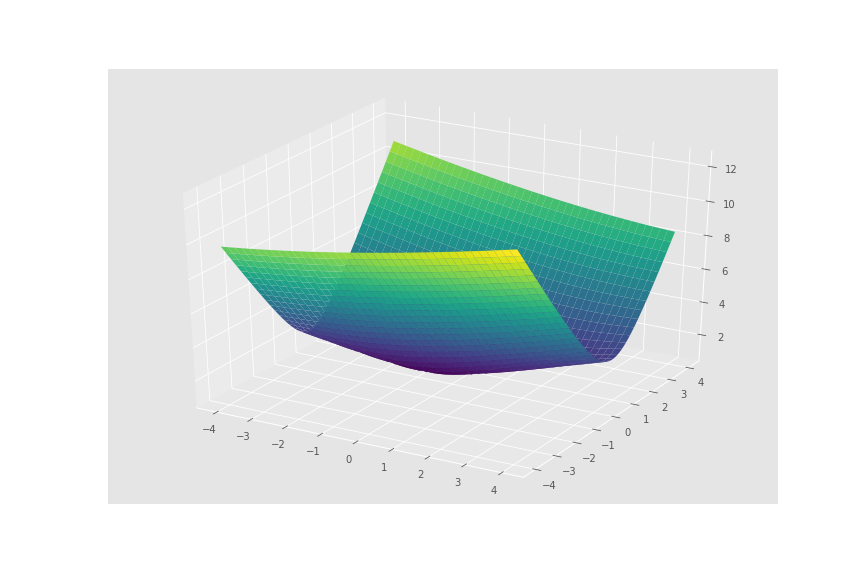

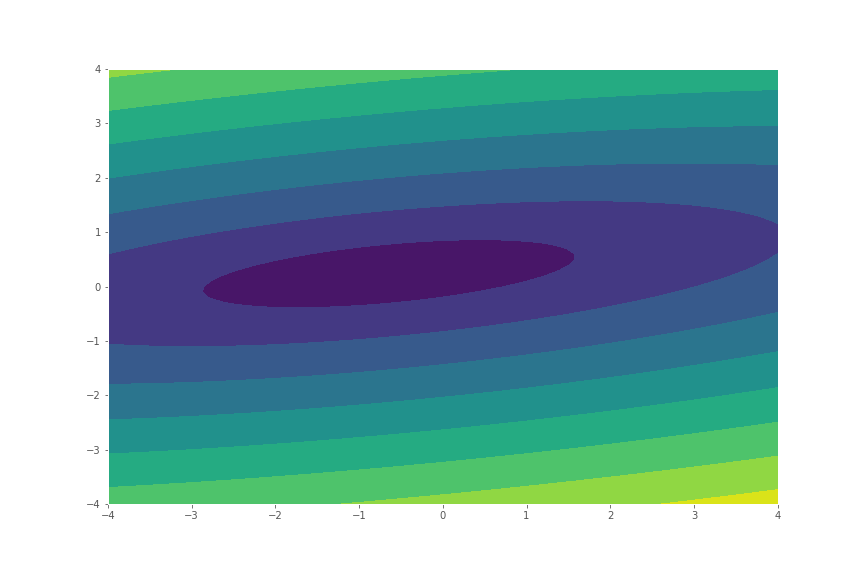

In [4]:
class LeastSquare(object):
    def __init__(self, X, y):
        self.X = np.insert(LeastSquare._format_ndarray(X), 0, 1, axis=1)
        self.y = LeastSquare._format_ndarray(y)
        self.idx = np.array([i for i in range(self.X.shape[0])])
        self._pos = 0
        
    def _format_ndarray(arr):
        arr = np.array(arr) if type(arr) is not np.ndarray else arr
        return arr.reshape((arr.shape[0], 1)) if len(arr.shape) == 1 else arr
    
    def val(self, beta):
        beta = LeastSquare._format_ndarray(beta)
        ####### Complete this part ######## or die ####################
        prediction = np.dot(beta.T, self.X.T)
        errors = np.power(prediction - self.y.T, 2)
        val = errors.sum()/(2*self.X.shape[0])
        ###############################################################
        return val
    
    def _shuffle(self):
        np.random.shuffle(self.idx)
    
    def grad(self, beta, batch_size=-1):
        batch_size = self.X.shape[0] if batch_size == -1 else batch_size
        idx = self.idx[self._pos:self._pos+batch_size]

        self._pos = (self._pos+batch_size) % self.X.shape[0]
        if self._pos == 0:
            self._shuffle()
            
        X, y = self.X[idx], self.y[idx]

        beta = LeastSquare._format_ndarray(beta)
        
        ####### Complete this part ######## or die ####################
        grad = (np.dot(np.dot(X.T, X), beta)-np.dot(X.T, y))/X.shape[0]
        ###############################################################
        return grad
    

l = LeastSquare(X, y)
print('La valeur de la loss pour le vrai parametre est', l.val(beta))
print('La valeur du gradient pour le vrai parametre est\n', l.grad(beta))
plot_loss_contour(l, three_dim=True)
plot_loss_contour(l, three_dim=False)

Attention, pour des raisons de temps de calcul, l'estimation du gradient n'est pas tout le temps faite sur tout le jeu de données mais sur une partie de celui-ci. Un estimateur calculé de cette manière là aura en espérance la même valeur qu'un gradient calculé sur toutes les données.

---
<span style="color:blue">**Question :**</span> **Saurez-vous retrouver dans le code ci-dessus ce qui permet de jouer sur la taille du batch lors du calcul du gradient ?**

---

###  L'algorithme de descente de gradient

---
<span style="color:blue">**Exercice :**</span> **Complétez le code de descente de gradient.**

---

In [5]:
class GradientDescent(object):
    init = np.random.uniform(-4, 4, size=2).reshape((2, 1))
    def __init__(self, X, y, loss=LeastSquare):
        self.loss = loss(X, y)
        
    def optimize(self, learning_rate = 0.005, nb_iterations=100, beta=init, batch_size=-1):
        param_trace = [beta.T[0]]
        loss_trace = [self.loss.val(beta)]
        for i in range(nb_iterations):
            ####### Complete this part ######## or die ####################
            beta = beta - learning_rate * self.loss.grad(beta, batch_size=batch_size)
            ###############################################################
            param_trace.append(beta.T[0])
            loss_trace.append(self.loss.val(beta))
            
        return param_trace, loss_trace
        
gd = GradientDescent(X, y)

In [6]:
param_trace, loss_trace = gd.optimize(nb_iterations=500)

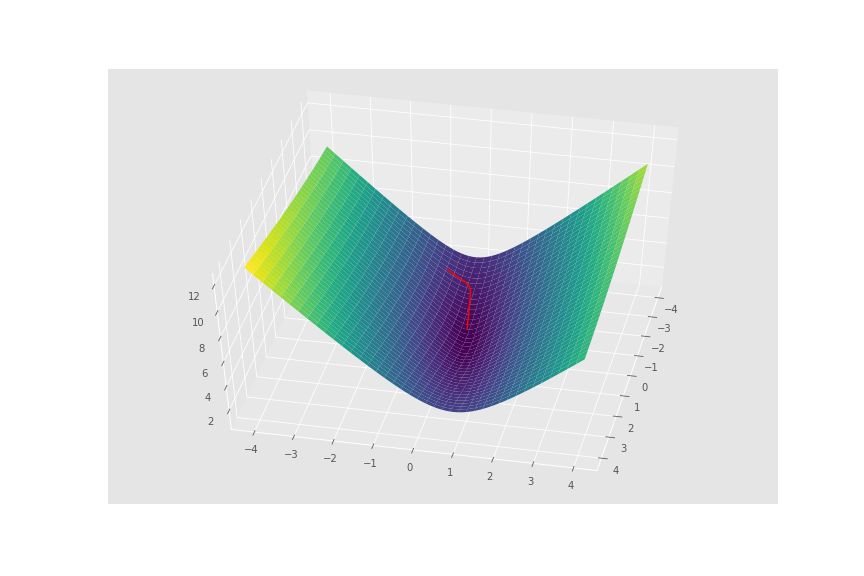

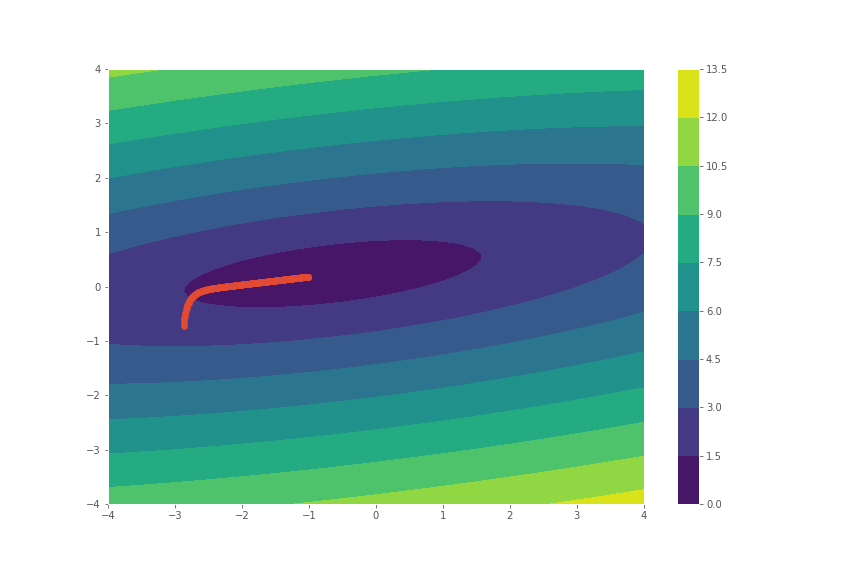

In [7]:
param_trace = np.array(param_trace)
loss_trace = np.array(loss_trace)
loss_trace = loss_trace.reshape((loss_trace.shape[0], 1))
xyz = np.concatenate([param_trace, np.sqrt(loss_trace)], axis=1)

plot_loss_contour(l, param_trace=xyz, three_dim=True)
plot_loss_contour(l, param_trace=param_trace, three_dim=False)

In [8]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
%matplotlib inline

output = widgets.Output()

@output.capture()
def interactive_gradient_descent(learning_rate, batch_size):
    clear_output()
    param_trace , loss_trace = gd.optimize(learning_rate = learning_rate, batch_size = batch_size)
    plot_loss_contour(gd.loss, param_trace, figsize=(14.0, 6.0))

In [9]:
widgets.interact(interactive_gradient_descent,
                 learning_rate=widgets.FloatSlider(value=1e-5, min=1e-5, max=0.05, step=0.0001, 
                                                   continuous_update=False, readout_format='.5f'),
                 batch_size=widgets.IntSlider(value=X.shape[0], min=1, max=X.shape[0], step=1, 
                                              continuous_update=False)
)
display(output)

interactive(children=(FloatSlider(value=1e-05, continuous_update=False, description='learning_rate', max=0.05,…

Output()

**Remarques et questions sur GD**: On constate que la descente de gradient (GD) se déplace bien orthogonalement aux lignes de niveaux de la fonction de coût. C'est une propriété du gradient d'une fonction. A mesure qu'on avance vers le minimum de la fonction, on se déplace de plus en plus lentement vers ce dernier. Pouvez vous dire pourquoi intuitivement ou analytiquement en regardant l'expression du gradient que vous avez dérivé plus haut ? Soit $\boldsymbol{\beta}^{(0)} = [0.0,  0.0]$ et $\rho$, montrez que GD converge necessairement vers la solution otpimale (cette question est interessante par rapport à la partie suivante sur les équations normales de la régression linéaire et la notion de solution par pseudo inverse).

**Remarques et questions sur SGD (avec un gradient estimé sur un sous-ensemble)**: La propriété d'orthogonalité par rapport aux lignes de niveau de la fonction de coût est elle conservée dans ce cas ? Pourquoi ? Ne suit-on pourtant toujours pas le gradient ? Que pouvez vous dire sur la nature et la "vitesse" de convergence vers le minimum de la fonction ? Réfléchissez d'un point de vue calculatoire sur ce qui se passe sur des tailles d'échantillons très grandes ? 

### Les équations normales de la régression linéaire: la solution par pseudo-inverse

Comme calculé plus haut, l'expression du gradient est donnée par $X^TX\boldsymbol{\beta}-X^T\boldsymbol{y}$.  La fonction $J$ étant coercive et convexe, elle admet au moins un minimum local/global. De plus, les points critiques sont donnés en annulant le gradient :
\begin{equation}
X^TX\boldsymbol{\beta}-X^T\boldsymbol{y} = 0 \Leftrightarrow X^TX\boldsymbol{\beta}=X^t\boldsymbol{y}.
\end{equation}
Il s'agit des équations dites "normales". Tout vecteur $\boldsymbol{\beta}$ solution de ces équations est donc nécessairement un minimiseur de $J(\boldsymbol{\beta})$.

**Dans le cas standard** où chaque variable explicative est linéairement indépendante des autres et où le nombre d'échantillons de notre jeu de données est supérieur ou égal à la dimension du problème considéré, la matrice $X^TX$ est inversible. Dit autrement, il existe une unique solution aux équations normales donnée par :
\begin{equation}
\hat{\boldsymbol{\beta}}=(X^TX)^{-1}X^T\boldsymbol{y}.
\end{equation}
On appelle $X^\dagger = (X^TX)^{-1}X^T$  pseudo-inverse de $X$ (ou inverse généralisé) et la solution analytique à notre problème est donnée par $\hat{\boldsymbol{\beta}}=X^\dagger \boldsymbol{y}$.

**Dans le cas non standard** où certaines variables peuvent être des combinaisons linéaires d'autres variables (inutile en pratique) ou si le nombre d'échantillons est inférieur à la dimension, $X^TX$ n'est plus inversible. Dans ce cas de figure, il existe une infinité de solutions aux équations normales (i.e. une infinité de minimiseurs). E. H. Moore (1920), A. Bjerhammar (1951) et R. Penrose (1955) proposent indépendamment une expression générale de $X^\dagger$ appelée pseudo-inverse de Moore-Penrose et calculable à partir d'une décomposition en valeur singulière, notée $X^\dagger$. Celle-ci coïncide bien sûr avec l'expression standard lorsqu'elle existe. On obtient donc une expression analytique générale, solution des équations normales :
\begin{equation}
\hat{\boldsymbol{\beta}}=X^\dagger\boldsymbol{y},
\end{equation}
où $X^\dagger$ est le pseudo-inverse de Moore-Penrose.

**La structure de la solution** peut s'étudier en remplaçant $\boldsymbol{y}$ par sa construction, à savoir, une combinaison linéaire et du bruit :
\begin{equation*}
\hat{\beta}=X^\dagger y = X^\dagger(X\boldsymbol{\beta} + \eta) = (X^\dagger X)\boldsymbol{\beta} + X^\dagger\eta
\end{equation*}

où on utilise $\eta$ plutôt que $\epsilon$ pour différentier la réalisation effective du bruit de la variable aléatoire.

On observe, par propriété de la pseudo-inverse, que la première contribution est la projection orthogonale du vrai modèle sur l'espace des vecteurs ligne de $X$. Il est donc une combinaison linéaire des vecteurs que l'on voit pendant l'apprentissage ! La deuxième contribution est l'effet du bruit sur la solution optimale. Nous discuterons plu loin de ces contributions et d'effets étranges qui peuvent se produire notament quand la matrice $X$ est mal conditionnée (possède des valeurs singulière très petites voire nulles).

### À vous de jouer

---
<span style="color:blue">**Exercice :**</span> **Calculez la solution du problème de régression linéaire en utilisant la pseudo-inverse de Moore-Penrose proposée par $\texttt{numpy}$ via $\texttt{np.linalg.pinv}$.**

---

La loss pour la solution par pseudo-inverse est 0.36982035419779924
La loss pour la solution obtenue par descente de gradient est 0.47043924324168873


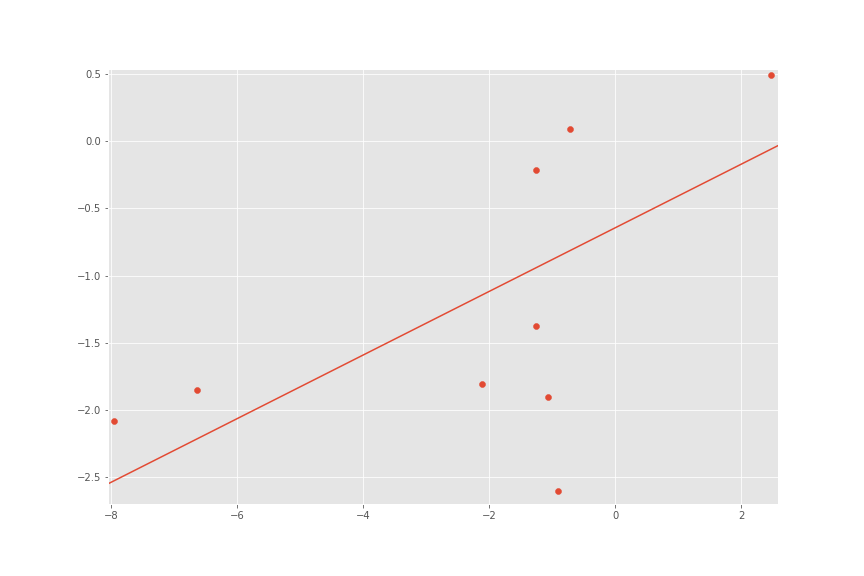

In [10]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
# descente de gradient

# descente de gradient sans stochasticite
param_trace , loss_trace = gd.optimize(learning_rate = 0.04, nb_iterations=50) 

####### Complete this part ######## or die ####################
# solution par pseudo inverse
X_inv = np.linalg.pinv(np.insert(X.reshape((X.shape[0], 1)), 0, 1, axis=1))
beta_pinv = np.dot(X_inv, y)
###############################################################

print('La loss pour la solution par pseudo-inverse est', l.val(beta_pinv))
print('La loss pour la solution obtenue par descente de gradient est', loss_trace[-1])

plot(X, y, beta_pinv)

---
<span style="color:blue">**Remarques et question :**</span> **On remarque ici que la valeur de la loss atteinte par GD est plus haute que celle atteinte par la solution de la pseudo-inverse. A votre avis pourquoi ? Augmentez le nombre d'itérations de GD. Que constatez vous par rapport ? Est-ce étonnant par rapport à votre brillante démonstration sur GD dans la section précédente ? Au passage, on pourrait s'amuser à montrer qu'avec la même intialisation de $\beta$, chaque step reste bien dans l'espace engendré par les vecteurs lignes de X. Qui veut passer au tableau ? (personne car covid)**

---

### Avec sklearn

---
<span style="color:blue">**Exercice :**</span> **Proposez une régression linéaire sur le même problème en utilisant $\texttt{sklearn}$.**

---

La loss pour la solution obtenue par Sklearn est 0.36982035419779935


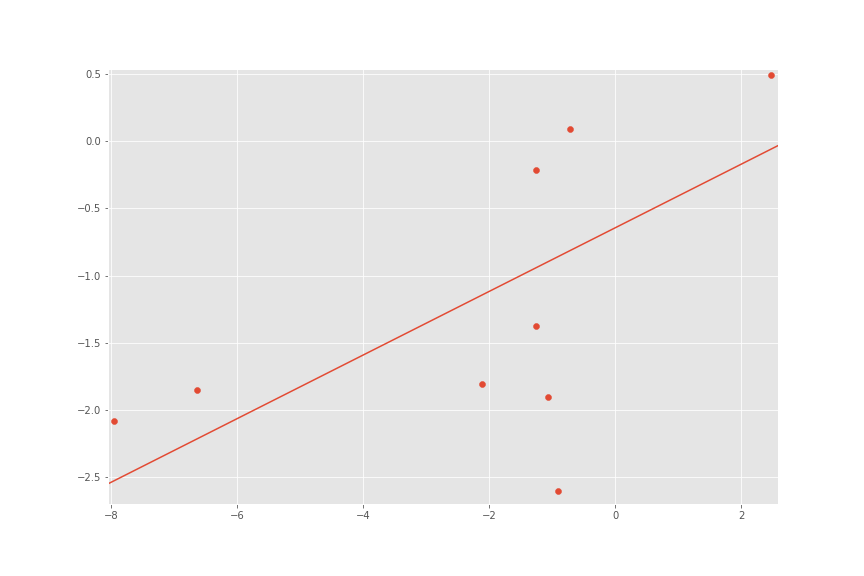

In [11]:
from sklearn.linear_model import LinearRegression

####### Complete this part ######## or die ####################
model = LinearRegression()
model.fit(X.reshape((X.shape[0], 1)), y)
###############################################################
coef = list(model.coef_)
coef.insert(0, model.intercept_)

print('La loss pour la solution obtenue par Sklearn est', l.val(coef))

plot(X, y, coef)

## Features - Variables explicatives transformées

Dans beaucoup de problèmes réels, la variable à expliquer n'est pas une simple combinaison linéaire des variables explicatives. Cela peut-être une dépendence non linéaire (e.g. quadratique), ou des dépendences croisées entre nos variables explicatives. La stratégie permettant d'aborder cette problématique consiste à transformer notre vecteur $\boldsymbol{x}$ en rajoutant par exemple des transformations quadratiques et à optimiser notre modèle linéaire sur le vecteur transformé. Afin de simplifier les notations, nous allons volontairement omettre le biais $\beta_0$ de nos notations.

Construire nos *features* consiste à chercher une fonction $\phi:\mathbb{R}^d\mapsto\mathbb{R}^p$ qui transforme non-linéairement nos variables explicatives initiales.


Le problème se reformule ainsi de la manière suivante :
\begin{equation}
\hat{y}=\langle \phi(\boldsymbol{x}), \boldsymbol{\beta}\rangle
\end{equation}

Le gradient est alors calculé en fonction de $\boldsymbol{z}=\phi(\boldsymbol{x})$ et non en fonction de $\boldsymbol{x}$. Il suffit donc de transformer nos variables explicatives par $\phi$ et de considérer le résultat comme nos nouvelles variables explicatives.

### Construction du jeu de données polynomial

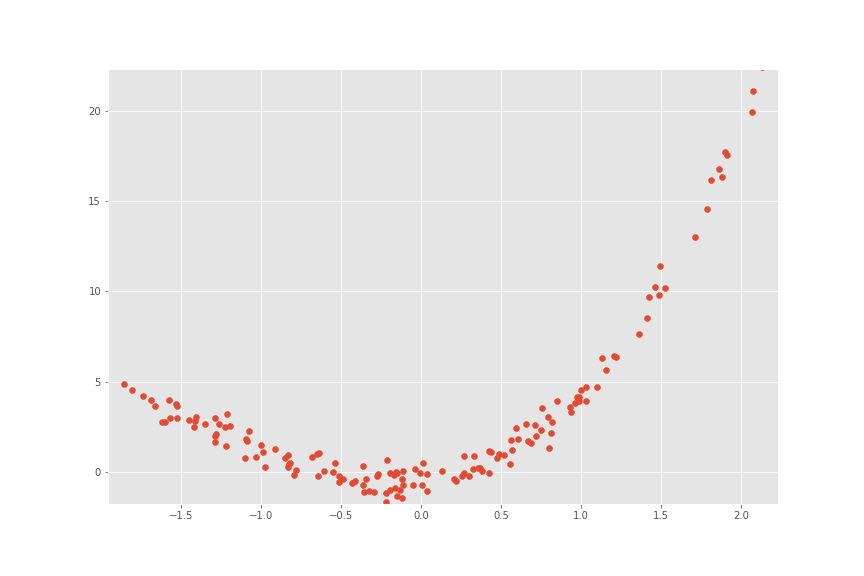

In [12]:
import numpy as np

# vrais parametres
beta_cube = np.random.uniform(-4, 4, size=(4,1))

def sample_data_cube(n, sigma=1):
    X = np.random.normal(0, sigma, size=n)
    noise = np.random.normal(1, 1, size=n)/2
    y = beta_cube[3] * X ** 3 + beta_cube[2] * X ** 2 + beta_cube[1] * X + beta_cube[0] + noise
    return X, y
X, y = sample_data_cube(6)
X_test, y_test = sample_data_cube(150)

#affichage du polynome
plot(X_test, y_test)

### Solution par pseudo-inverse

---
<span style="color:blue">**Exercice :**</span> **Complétez le code ci-dessous en utilisant une solution par pseudo-inverse via $\texttt{numpy}$.**

---

In [13]:
class Polynomial(object):
    def __init__(self, deg):
        self.deg = deg

    def _transform(self, X):
        # here we transform the input into a polynomial
        ####### Complete this part ######## or die ####################
        t = []
        X = X.reshape((X.shape[0], 1)) if len(X.shape) == 1 else X
        for i in range(0, self.deg+1):
            t.append(X**i)
        return np.concatenate(t, axis=1)
        ###############################################################
    
    def fit(self, X, y):
        ####### Complete this part ######## or die ####################
        X_transformed = self._transform(X)
        self.beta = np.dot(np.linalg.pinv(X_transformed), y)
        ###############################################################
        
    def predict(self, X):
        if self.beta is None:
            print('You must fit the model first')
        else:
            X_transformed = self._transform(X)
            return np.dot(X_transformed, self.beta)
    def score(self, X, y):
        prediction = self.predict(X)
        errors = (prediction - y) **2
        return errors.sum()/errors.shape[0]
    
# vraie solution
real_model = Polynomial(deg=3)
real_model.beta = beta_cube

---
<span style="color:blue">**Remarques et exercice :**</span> **Le plot est affiché avec un jeu dit de test. Il s'agit d'un ensemble de points qui n'ont pas été utilisés lors de notre apprentissage (par pseudo-inverse). Le jeu de données $\texttt{X, y}$ d'une taille différente est celui qui a été utilisé.**

**Jouez avec le degré du polynôme que vous manipulez et observez le résultat. Que constatez-vous ?**

---

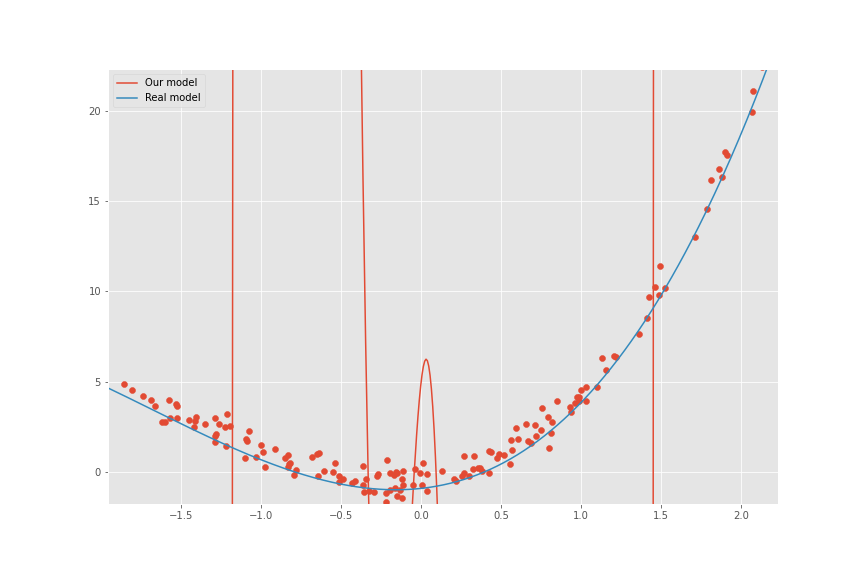

Empirical risk:  3.207277945846471e-24


In [14]:
deg = 6
model = Polynomial(deg)

model.fit(X, y)

plot(X_test, y_test, func=[(model.predict, 'Our model'), (real_model.predict, 'Real model')])

print('Empirical risk: ', model.score(X, y))

---
<span style="color:blue">**Remarque et question :**</span> **Le risque empirique est celui calculé directement sur les données utilisées lors du calcul du pseudo-inverse. Que constatez-vous par rapport à ce dernier lorsque vous jouez avec le degré du polynôme ?**

**Est-il un bon indicateur du véritable risque de généralisation ? Autrement dit, est-il un bon indicateur de la qualité du polynôme obtenu.**

---

### Solution Sklearn

---
<span style="color:blue">**Exercice :**</span> **Proposez la même solution polynomiale via $\texttt{sklearn}$. Choisissez le même degré qu'utilisé au-dessus et comparez les résultats.**

---

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

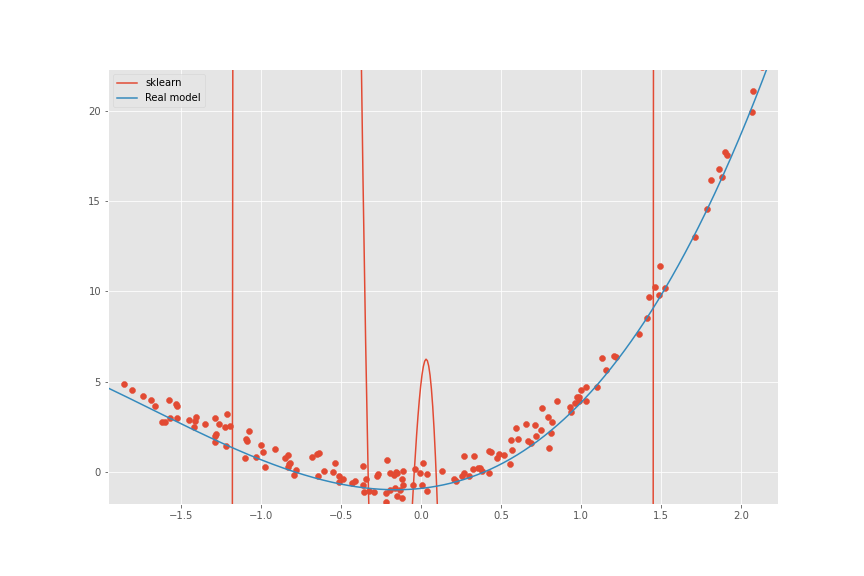

In [16]:
####### Complete this part ######## or die ####################
model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
model.fit(X.reshape((X.shape[0], 1)), y)
###############################################################

plot(X_test, y_test, func=[(model.predict, 'sklearn'), (real_model.predict, 'Real model')])

## L'effet de double descente (Bonus ?)

Comme vu précédemment, l'effet du bruit sur l'estimateur depend du conditionnement de $X^T$. Le conditionnement d'une matrice $A$ inversible est donné par :
\begin{equation}
C(A)=\lVert A^{-1}\rVert\lvert A\rVert
\end{equation}
Il est évident que si $A\in{\mathbb{R}^{1\times 1}}^\star$, alors $C(A)=1$. Ce n'est absolument pas vrai dans le cas général.

L'exemple ci-dessous illustre cela via la norme de Frobenius (norme Euclidienne appliquée à une matrice, $\text{Tr}(A^TA)^{0.5}$). On préfèrera en pratique la norme d'opérateur qui quantifie les effets d'amplification d'un vecteur $\boldsymbol{x}$ lorsqu'on calcule $A\boldsymbol{x}$. Cette norme d'opérateur est directement liée aux valeurs propres.

In [21]:
A = np.diag([1, 0.0001])
print('C(A)=' + str(np.linalg.norm(np.linalg.inv(A))*np.linalg.norm(A)))

C(A)=10000.000100000001


On remarque dans l'exemple que la matrice $A$ possède une toute petite valeur propre qui est responsable de cet écart. L'exercice ci-dessous montre qu'au-delà des considérations théoriques, cela a des répercussions importantes et totalement inattendues en réalité.

Les simulations suivantes permettent de mettre en lumière cela. Elles sont construites comme décrit ci-dessous :
\begin{equation}
\beta\sim\mathbb{U}(-2, 2)^d,\ d\in\mathbb{N}^\star
\end{equation}

dit autrement, on fixe un vecteur de paramètres selon une loi uniforme qui dépend de la dimension du problème.
Nous avons ensuite :
\begin{equation}
x\sim\mathcal{N}(\boldsymbol{0}, \boldsymbol{I_d}) + \epsilon,\ \epsilon\sim\mathcal{N}(0, \sigma^2)
\end{equation}

On construit ensuite un jeu de test de taille $500$ et un jeu d'apprentissage de taille variable. L'objectif ici sera d'étudié l'effet de la taille du jeu d'apprentissage sur la qualité de notre modèle, qualité que l'on aura calculée sur le test. Pour chaque taille de jeu de données, l'expérience est répétée $50$ ($\texttt{redo}$) fois afin de lisser les courbes obtenues.

---
**<span style="color:blue"> Exercice :</span>** **Exécutez une première fois le code puis jouez avec $\texttt{noise}$ (i.e. $\sigma$) afin de voir ce qui se passe selon la quantité de bruit. Essayez de décrire rigoureusement ce que vous observez.**

---

In [22]:
import numpy as np

####### Play with the noise #########
noise = 1.
#####################################

d = 50
redo = 50

beta = np.random.uniform(-2, 2, size=(d, 1))

mu = [0 for _ in range(d)]
cov = np.diag([1 for _ in range(d)])

test_size = 500
X_test = np.random.multivariate_normal(mean=mu, cov=cov, size=test_size)
y_test = np.dot(X_test, beta) + np.random.normal(0, 1, size=(test_size, 1)) * noise

errors = []
train_errors = []
for m in range(1, 100):
    error = 0
    train_error = 0
    for j in range(redo):
        # dataset construction
        X = np.random.multivariate_normal(mean=mu, cov=cov, size=m)
        y = np.dot(X, beta) + np.random.normal(0, 1, size=(m, 1)) * noise
        
        # param estimation
        beta_pinv = np.dot(np.linalg.pinv(X), y)
        
        # risk estimation
        error += ((np.dot(X_test, beta_pinv)-y_test)**2).sum()/(test_size*redo)
        train_error += ((np.dot(X, beta_pinv)-y)**2).sum()/(m*redo)
    train_errors.append(train_error)
    errors.append(error)

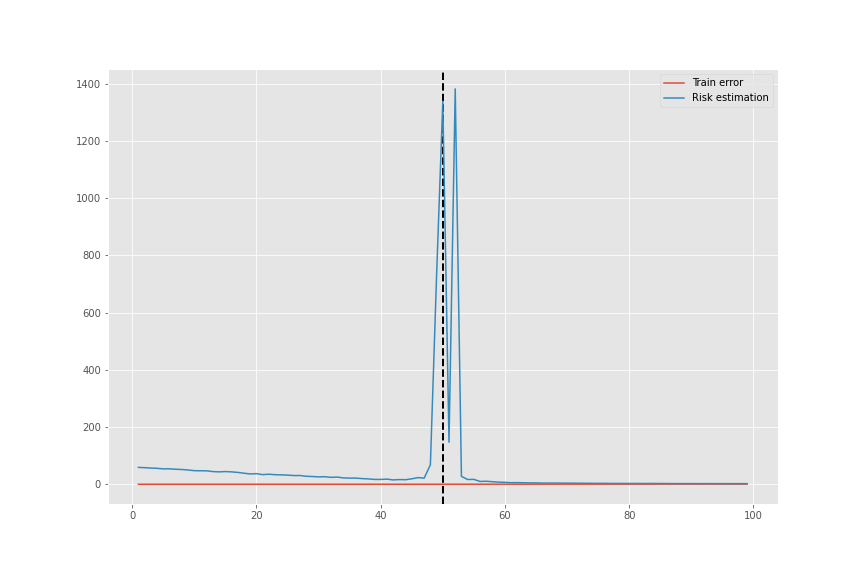

In [23]:
plt.figure()
plt.plot([i for i in range(1, len(errors)+1)], train_errors, label="Train error")
plt.axvline(x=d, color='k', linewidth=2.0, linestyle='--')
plt.plot([i for i in range(1, len(errors)+1)], errors, label="Risk estimation")
plt.legend()
plt.show()

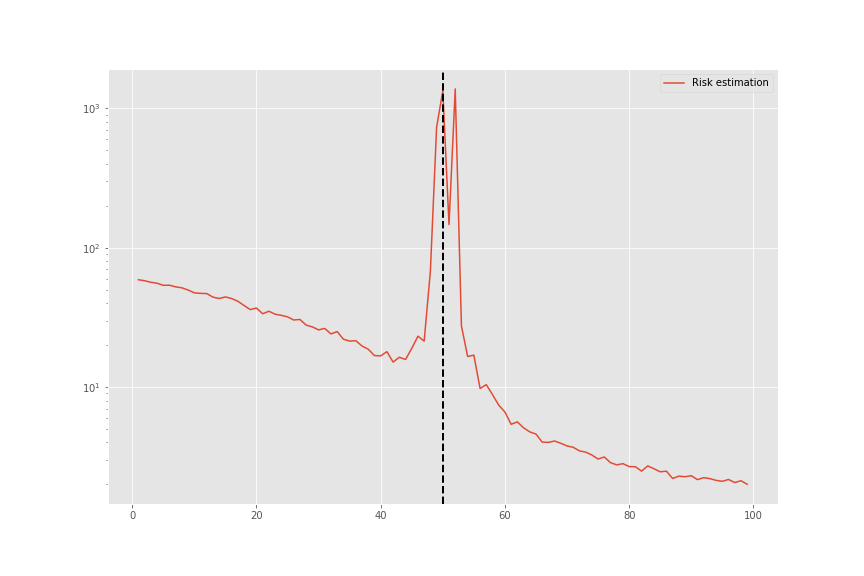

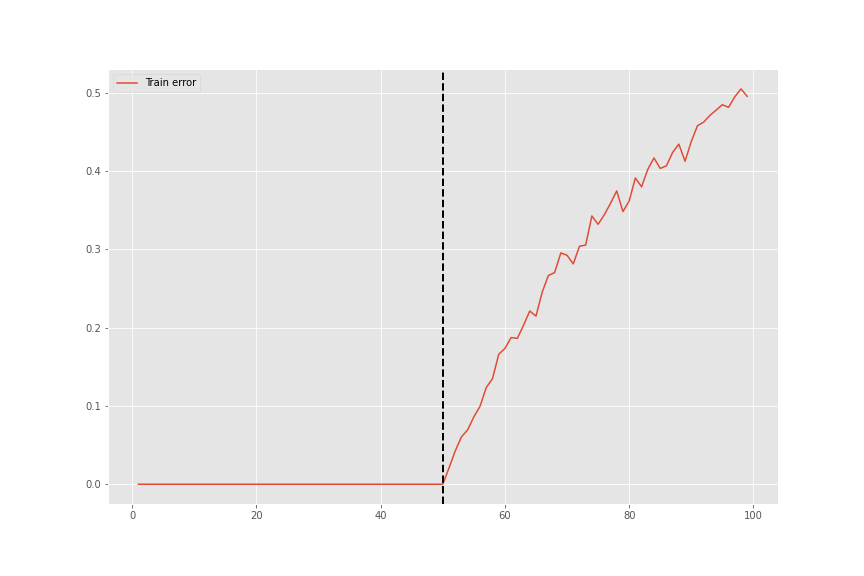

In [24]:
plt.figure()
plt.plot([i for i in range(1, len(errors)+1)], errors, label="Risk estimation")
plt.axvline(x=d, color='k', linewidth=2.0, linestyle='--')
plt.legend()
plt.yscale('log')
plt.show()
plt.figure()
plt.plot([i for i in range(1, len(train_errors)+1)], train_errors, label="Train error")
plt.axvline(x=d, color='k', linewidth=2.0, linestyle='--')
plt.legend()
plt.show()

La ligne en pointillé sépare visuellement deux régimes différents. La transition d'un régime à l'autre se produit par une augmentation catastrophique de l'erreur de généralisation de notre modèle.

---
**<span style="color:blue"> Question :</span>** **Quelle particularité différentie les deux phases ?**

---

En réalité, les méthodes de *machine learning* traditionnelles se situent plutôt dans le régime de "droite". L'étude de ce phénomène est poussée par les approches comme le *deep learning* qui sont souvent dans le régime de gauche. Comprendre ces phénomènes nous permet par exemple d'éclairer les raisons du succès du *deep learning*.

## Regularisation

Comme illustré par les quelques scénarios précédents dont le cas catastrophique de la double descente, une certaine parcimonie est attendue par notre modèle. On a pu notamment observer que les "mauvaises" fonctions du point de vue du risque de généralisation avaient une forte tendance à osciller n'importe comment. Au lieu de laisser jouer le "hasard" (ou plutôt le conditionnement de notre matrice de design $X$), nous pouvons contraindre notre optimisation à favoriser les solutions parcimonieuses ; c'est-à-dire des solutions qui n'oscillent pas n'importe comment.

Intuitivement, on va choisir une solution qui minimise à la fois le risque empirique $J(\boldsymbol{\beta})$, mais aussi une pénalité sur la quantité "d'oscillation". En réalité, les oscillations sont directement contrôlées par la norme des paramètres : un grand poids rendra une variable explicative très sensible au moindre changement.

Nous parlons d'optimisation régularisée lorsque la fonction à optimiser s'écrit de la manière suivante :
\begin{equation}
J(\boldsymbol{\beta})=\frac{1}{m}\sum_{i=1}^nr(f_{\boldsymbol{\beta}}(\boldsymbol{x_i}), y_i)+\lambda P(\boldsymbol{\beta})
\end{equation}

où $r:\mathcal{Y}\times\mathcal{Y}\mapsto \mathbb{R}^+$ est notre risque élémentaire et $P:\mathbb{R}^d\mapsto\mathbb{R}^+$ une pénalité sur nore vecteur de paramètre. Plus précisément, dans le cas de la régression linéaire, nous avons :
\begin{equation}
r(\hat{y}, y)=(\hat{y}-y)^2
\end{equation}

et
\begin{equation}
P(\boldsymbol{\beta})=\lVert \boldsymbol{\beta} \rVert,
\end{equation}

où $\lVert \cdot \rVert$ est une norme quelconque. Les choix classiques sont la norme $\ell_1$ :
\begin{equation}
\lVert \boldsymbol{\beta} \rVert_1=\sum_j |\boldsymbol{\beta}_j|
\end{equation}

et la norme $\ell_2$ :
\begin{equation}
\lVert \boldsymbol{\beta} \rVert_2 = \sqrt{\sum_j\boldsymbol{\beta}_j^2}=\sqrt{\boldsymbol{\beta}^T\boldsymbol{\beta}} 
\end{equation}

Une stratégie intermédiaire consiste à prendre la combinaison convexe des deux normes :
\begin{equation}
P(\boldsymbol{\beta})=\eta \lVert \boldsymbol{\beta} \rVert_1 + (1-\eta) \lVert \boldsymbol{\beta} \rVert_2.
\end{equation}
avec $\eta\in\big[0,1\big]$. On parle alors d'*elastic-net*.

Ces différentes régularisations ne se comportent pas de la même manière. Ainsi la régularisation $\ell_1$, aussi appelée Lasso, va forcer certains paramètres à atteindre la valeur $0$. Cela permet par exemple de favoriser l'explicabilité de notre modèle. En pratique, $\ell_2$, appelée Ridge, a tendance à donner les meilleurs résultats d'un point de vue prédictif.

### Construction du jeu de données

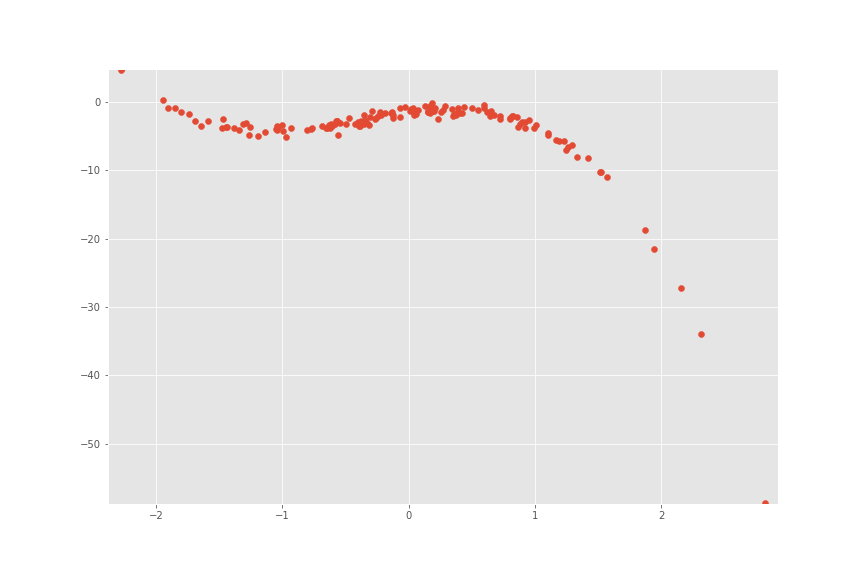

In [25]:
import numpy as np

beta_cube = np.random.uniform(-4, 4, size=(4,1))

def sample_data_cube(n, sigma=1):
    X = np.random.normal(0, sigma, size=n)
    noise = np.random.normal(1, 1, size=n)/2
    y = beta_cube[3] * X ** 3 + beta_cube[2] * X ** 2 + beta_cube[1] * X + beta_cube[0] + noise
    return X, y
X, y = sample_data_cube(20)
X_test, y_test = sample_data_cube(150)

X = X.reshape((X.shape[0], 1))
X_test = X_test.reshape((X_test.shape[0], 1))

plot(X_test, y_test)

### Sans régularisation

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

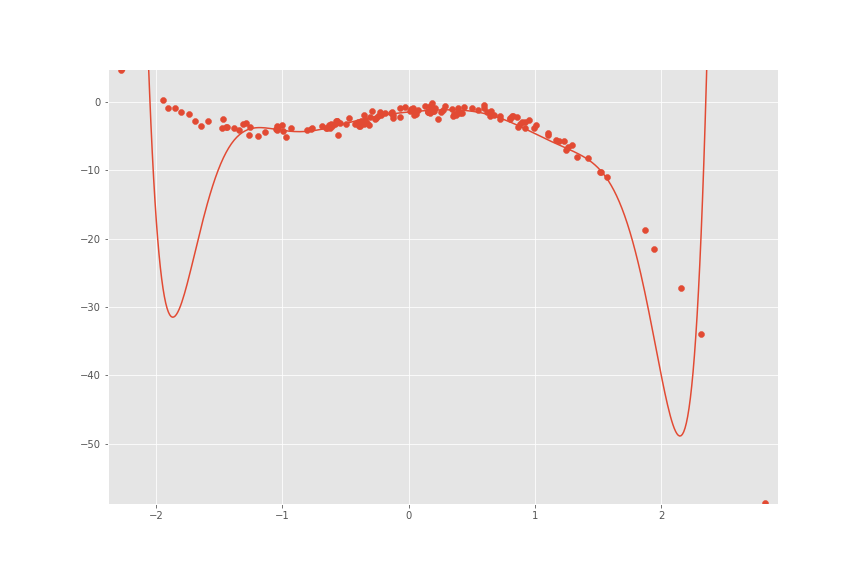

In [27]:
model = make_pipeline(PolynomialFeatures(10), LinearRegression())
model.fit(X, y)

plot(X_test, y_test, func=model.predict)

### Avec régularisation $\ell_1$

Lorsqu'on parle de régresion linéaire avec régularisation $\ell_1$, on parle aussi de Lasso.

---
**<span style="color:blue"> Exercice :</span>** **Testez plusieurs valeurs de $\alpha$ ($=\lambda$ dans notre texte). Quelle est la fonction la plus parcimonieuse que vous arrivez à obtenir ?**

---

In [28]:
from sklearn.linear_model import Lasso

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6193942865076565, tolerance: 0.1044784245958054
  positive)


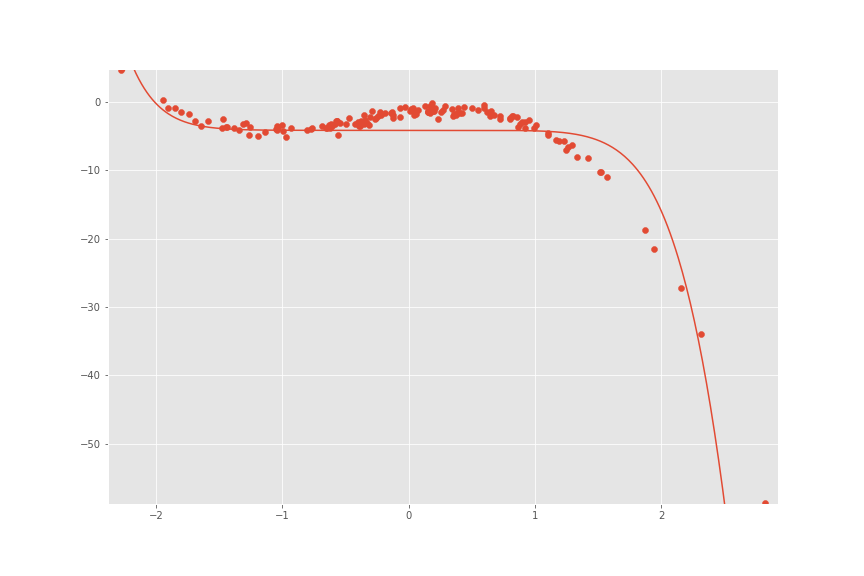

In [29]:
model = make_pipeline(PolynomialFeatures(10), Lasso(alpha=15.))
model.fit(X, y)

plot(X_test, y_test, func=model.predict)

In [30]:
print('Les paramètres du modèle sont sparses :\n', model[1].coef_)

Les paramètres du modèle sont sparses :
 [ 0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.03750508 -0.03202064 -0.00587273  0.00420263]


Vous avez du constater que selon la quantité de régularisation, les paramètres étaient plus ou moins sparse. Il se trouve qu'une fois qu'un paramètre est à 0, il le sera pour toutes les valeurs de $\alpha$ suppérieure. Afin d'observer visuellement, l'effet de la régularisation sur la sparsité, il est possible d'afficher ce qu'on appelle les "chemins Lasso" ou Lasso paths.

.

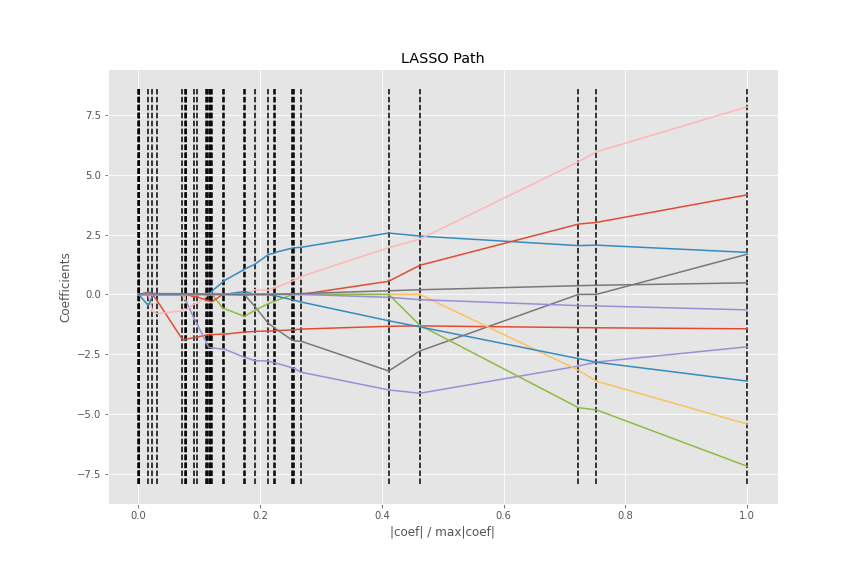

In [31]:
from sklearn.linear_model import lars_path
features = PolynomialFeatures(10)
X_transformed = features.fit_transform(X)
_, _, coefs = lars_path(X_transformed, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

A gauche se trouve le paramètre le plus parcimonieux (la plus grande valeur de $\alpha$). Tous les paramètres y sont donc nuls. Plus la valeur de $\alpha$ est réduite, plus le nombre de paramètres différents de $0$ augmente et leur valeur aussi.

### Avec régularisation $\ell_2$

Lorsqu'on parle de régresion linéaire avec régularisation $\ell_2$, on parle aussi de Ridge.

---
**<span style="color:blue"> Exercice :</span>** **Testez plusieurs valeurs de $\alpha$ ($=\lambda$ dans notre texte). Quelle est la fonction la plus parcimonieuse que vous arrivez à obtenir ?**

---

In [32]:
from sklearn.linear_model import Ridge

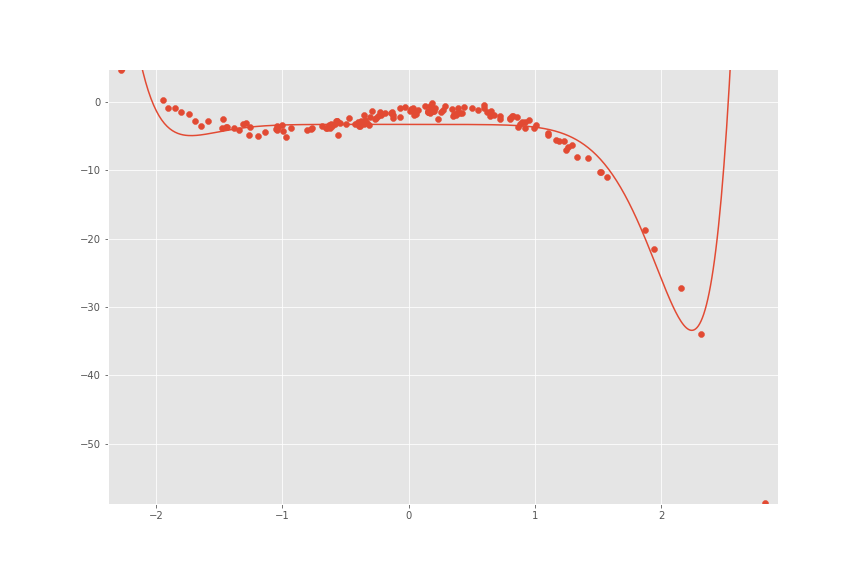

In [33]:
model = make_pipeline(PolynomialFeatures(10), Ridge(alpha=1000))
model.fit(X, y)

plot(X_test, y_test, func=model.predict)

### Avec régularisation *elastic-net*

Lorsqu'on parle de régresion linéaire avec régularisation *elastic-net*.

---
**<span style="color:blue"> Exercice :</span>** **Testez plusieurs valeurs de $\alpha$ ($=\lambda$ dans notre texte). Quelle est la fonction la plus parcimonieuse que vous arrivez à obtenir (Essayez de trouver la réponse en raisonnant) ?**

---

In [34]:
from sklearn.linear_model import ElasticNet

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7098277008416858, tolerance: 0.1044784245958054
  positive)


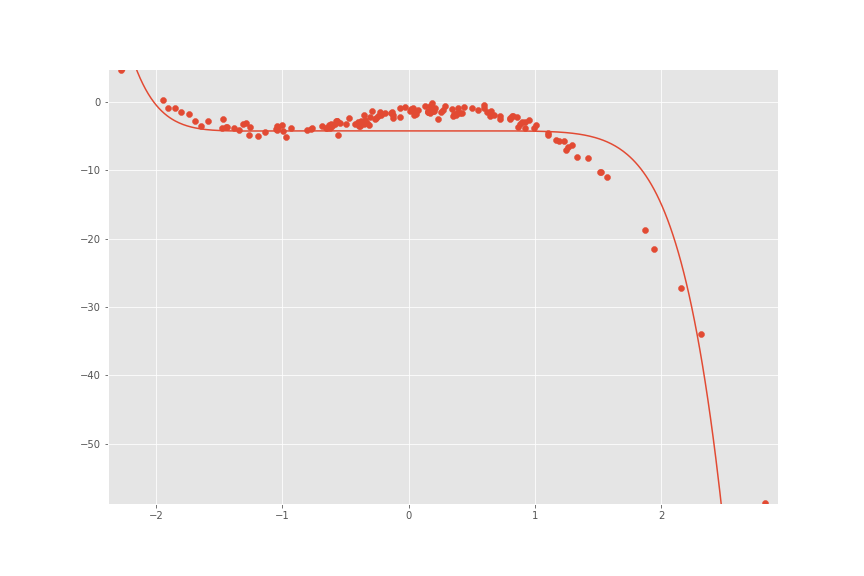

In [35]:
model = make_pipeline(PolynomialFeatures(10), ElasticNet(alpha=20, l1_ratio=0.8))
model.fit(X, y)

plot(X_test, y_test, func=model.predict)

## Le mot de la fin